In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [2]:
nyse = pd.read_csv("NYSE_monthly.txt")

# Load timeseries data

In [3]:
nyse.Month = pd.to_datetime(nyse.Month)
nyse.set_index('Month', inplace=True)

In [4]:
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


- Resampling
- Selecting and slicing
- Null values

# Visualizing time series data

## Line plots

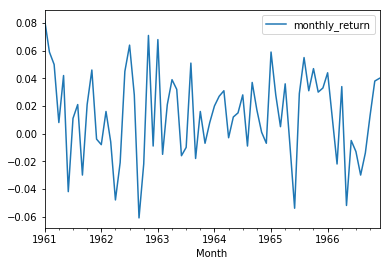

In [5]:
nyse.plot()
# nyse.plot(style = ".b") # dots
plt.show()

## Grouping

In [6]:
year_groups = nyse.groupby(pd.Grouper(freq = 'A'))

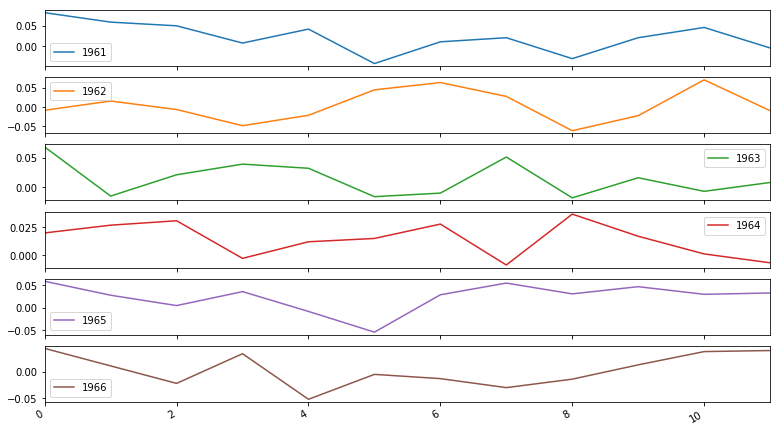

In [7]:
nyse_annual = pd.DataFrame()

for yr, group in year_groups:
    nyse_annual[yr.year] = group.values.ravel()
    
nyse_annual.plot(figsize=(13,8), subplots = True)
plt.show()

## Histograms

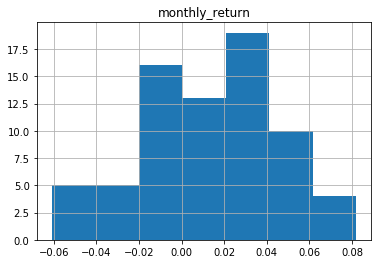

In [8]:
nyse.hist(bins=7)
plt.show()

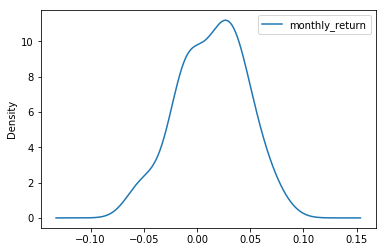

In [9]:
# KDE
nyse.plot(kind='KDE')
plt.show()

## Box plots

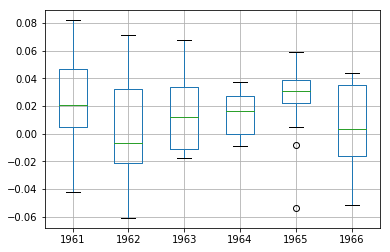

In [10]:
nyse_annual.boxplot()
plt.show()

## Time series heat maps

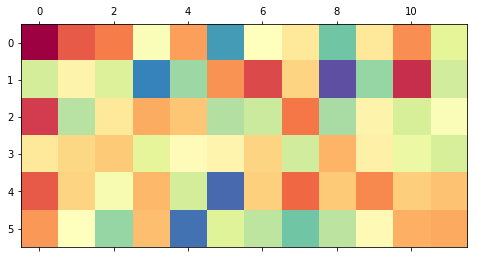

In [11]:
year_matrix = nyse_annual.T
plt.matshow(year_matrix, cmap=plt.cm.Spectral_r)
plt.show()

## Trends

- Stationary
- Linear (upward / downward)
- Exponential
- Periodic
- Periodic and upward

### Testing for trends

1. Rolling statistics
2. Dickey-Fuller test

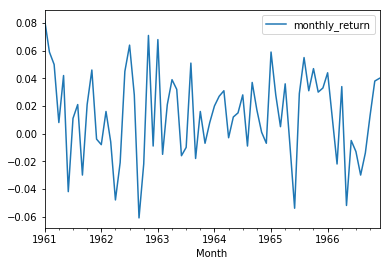

In [14]:
nyse.plot()
plt.show()

#### Rolling statistics

In [17]:
rolmean = nyse.rolling(window = 8, center = False).mean()
rolstd = nyse.rolling(window = 8, center = False).std()

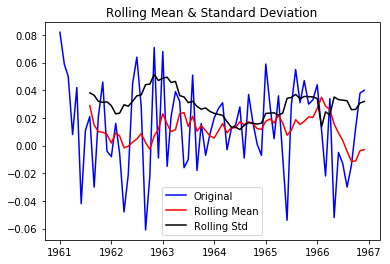

In [26]:
fig = plt.figure()
orig = plt.plot(nyse, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()

#### Dickey-Fuller test

Statistical test for testing stationary. Null-hypothesis for the test is that the time series is not stationary.

In [37]:
nyse_values = nyse.iloc[:,0].values

dftest = adfuller(nyse_values)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)
print ('Results of Dickey-Fuller Test:')
print(dfoutput)

(-7.895374756572353, 4.3251262842626954e-12, 0, 71, {'1%': -3.526004646825607, '5%': -2.9032002348069774, '10%': -2.5889948363419957}, -240.18590988937115)
Results of Dickey-Fuller Test:
Test Statistic                -7.895375e+00
p-value                        4.325126e-12
#Lags Used                     0.000000e+00
Number of Observations Used    7.100000e+01
Critical Value (1%)           -3.526005e+00
Critical Value (5%)           -2.903200e+00
Critical Value (10%)          -2.588995e+00
dtype: float64


### Eliminating trends

- Log transformation
- Substracting rolling mean
- Differencing

#### Log transformation

In [42]:
years = pd.date_range('2012-01', periods=72, freq="M")
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
final_series = sales+bigger+6
data = pd.Series(final_series, index=index)

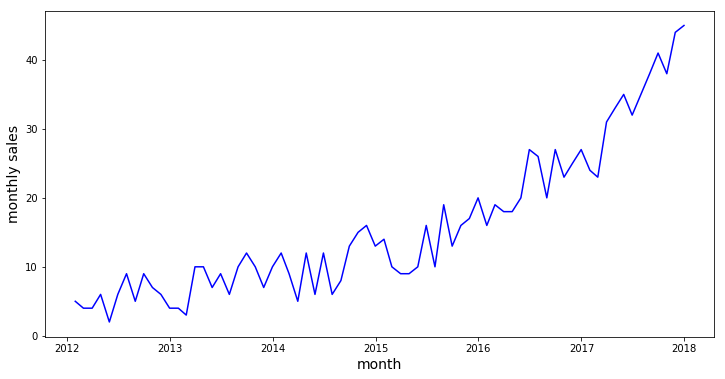

In [44]:
fig = plt.figure(figsize=(12,6))
plt.plot(data, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("monthly sales", fontsize=14)
plt.show()

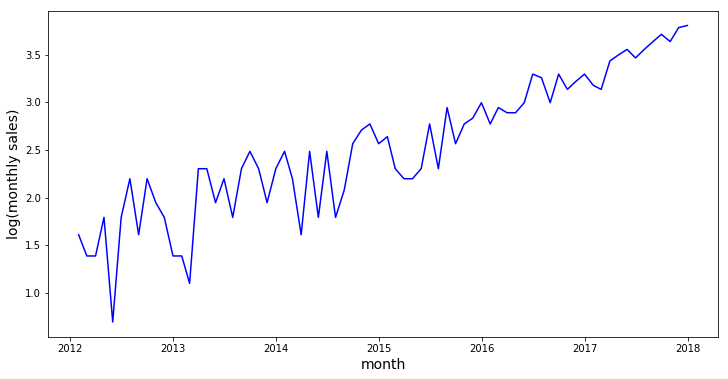

In [46]:
data = pd.Series(np.log(final_series), index=index)
fig = plt.figure(figsize=(12,6))
plt.plot(data, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()

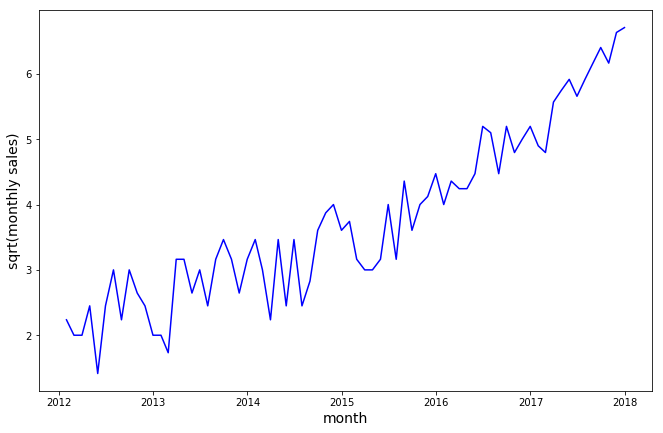

In [49]:
# there seems to be more heteroscedasticity in the model now. Let's look at what happens if you take the square root of this series
data = pd.Series(np.sqrt(final_series), index=index)
fig = plt.figure(figsize=(11,7))
plt.plot(data, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("sqrt(monthly sales)", fontsize=14)
plt.show()

#### Substracting the rolling mean / Weighted rolling mean

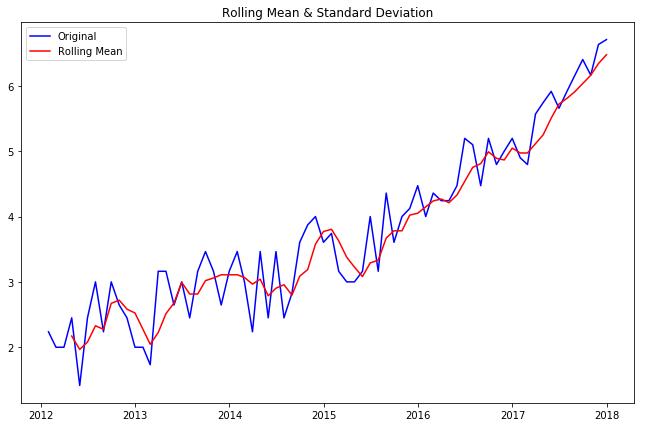

In [52]:
rolmean = data.rolling(window = 4).mean()
fig = plt.figure(figsize=(11,7))
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [54]:
data_minus_rolmean = data - rolmean
# Drop the NaN values from timeseries calculated above
data_minus_rolmean.dropna(inplace=True)

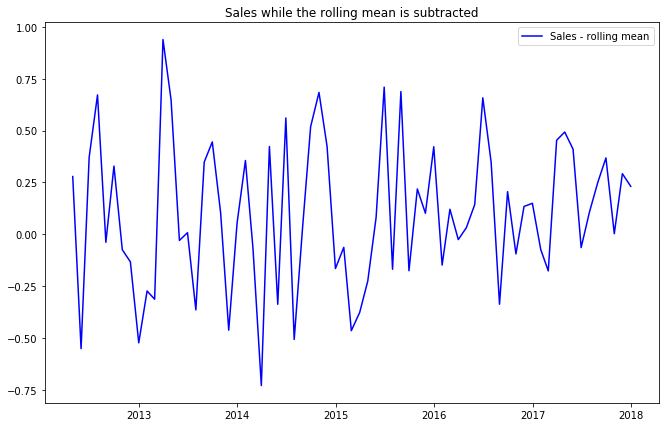

In [57]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolmean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

#### Differencing

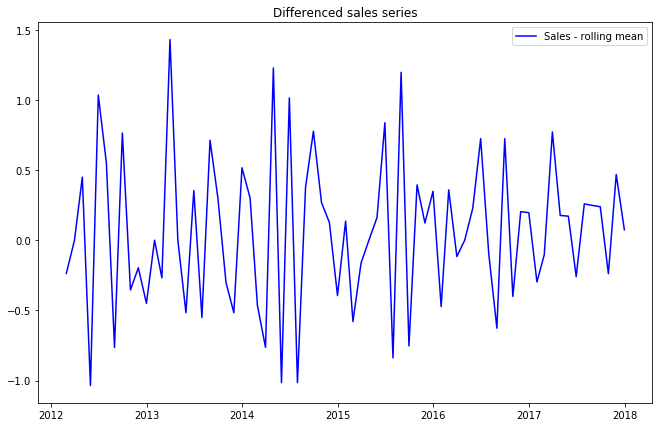

In [59]:
data_diff = data.diff(periods=1)
data_diff.head(10)

fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)